Saving sleep_cycle_productivity.csv to sleep_cycle_productivity.csv
Accuracy: 1.0

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       886
           1       1.00      1.00      1.00       114

    accuracy                           1.00      1000
   macro avg       1.00      1.00      1.00      1000
weighted avg       1.00      1.00      1.00      1000



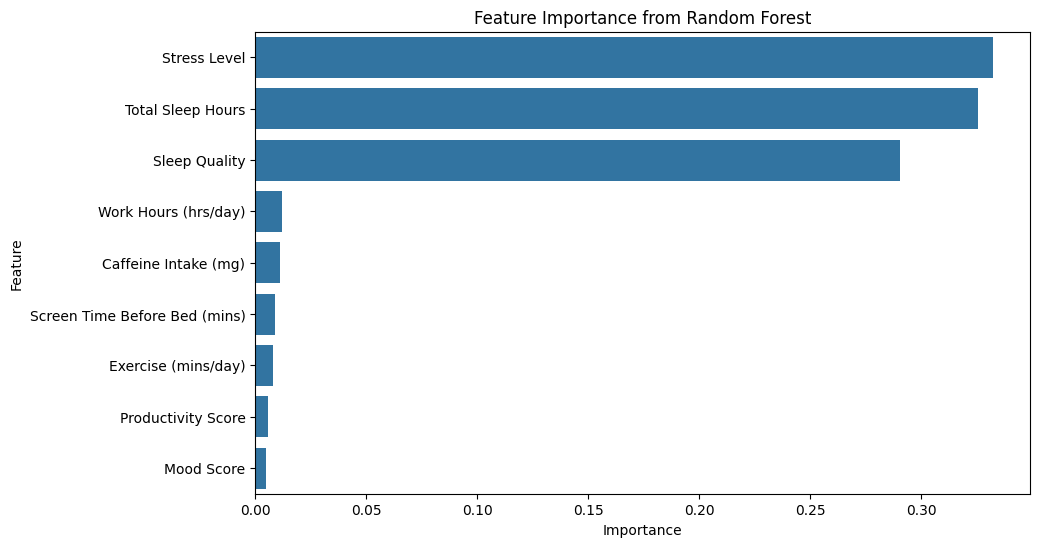

In [ ]:
# Install dependencies (optional in Colab)
# !pip install pandas scikit-learn matplotlib seaborn

import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# === STEP 1: Upload the CSV file ===
from google.colab import files
uploaded = files.upload()

# Load the uploaded file (replace with your filename if needed)
filename = list(uploaded.keys())[0]
df = pd.read_csv(filename)

# === STEP 2: Create Healthy_Sleep Label ===
df['Healthy_Sleep'] = np.where(
    (df['Total Sleep Hours'] >= 7) &
    (df['Sleep Quality'] >= 7) &
    (df['Stress Level'] <= 5),
    1,  # Healthy
    0   # Unhealthy
)

# === STEP 3: Select Features & Target ===
features = [
    'Total Sleep Hours',
    'Sleep Quality',
    'Exercise (mins/day)',
    'Caffeine Intake (mg)',
    'Screen Time Before Bed (mins)',
    'Work Hours (hrs/day)',
    'Productivity Score',
    'Mood Score',
    'Stress Level'
]
target = 'Healthy_Sleep'

X = df[features]
y = df[target]

# === STEP 4: Split Data ===
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# === STEP 5: Train Random Forest ===
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# === STEP 6: Evaluate Model ===
y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# === STEP 7: Feature Importance Visualization ===
importances = model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feature_importance_df.sort_values(by='Importance', ascending=False, inplace=True)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance from Random Forest')
plt.show()


In [ ]:
# First run the training code from earlier to ensure the model is trained.
# Then use the following code block for user input + prediction:

# === STEP 8: User Input & Prediction ===

def get_user_input():
    print("Please enter your sleep and lifestyle details:")
    try:
        total_sleep = float(input("Total Sleep Hours (e.g., 7.5): "))
        sleep_quality = int(input("Sleep Quality (1-10): "))
        exercise = int(input("Exercise (mins/day): "))
        caffeine = int(input("Caffeine Intake (mg): "))
        screen_time = int(input("Screen Time Before Bed (mins): "))
        work_hours = float(input("Work Hours (hrs/day): "))
        productivity = int(input("Productivity Score (1-10): "))
        mood = int(input("Mood Score (1-10): "))
        stress = int(input("Stress Level (1-10): "))

        return [[
            total_sleep, sleep_quality, exercise, caffeine, screen_time,
            work_hours, productivity, mood, stress
        ]]
    except ValueError:
        print("Invalid input. Please enter numbers only.")
        return None

# Get input
user_data = get_user_input()

# Predict and display result
if user_data:
    prediction = model.predict(user_data)[0]
    result = "✅ Healthy Sleep" if prediction == 1 else "❌ Unhealthy Sleep"
    print("\n🧠 Prediction Result:", result)


Please enter your sleep and lifestyle details:
Total Sleep Hours (e.g., 7.5): 8
Sleep Quality (1-10): 10
Exercise (mins/day): 80
Caffeine Intake (mg): 1
Screen Time Before Bed (mins): 0
Work Hours (hrs/day): 8
Productivity Score (1-10): 9
Mood Score (1-10): 8
Stress Level (1-10): 5

🧠 Prediction Result: ✅ Healthy Sleep


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [ ]:
import joblib
joblib.dump(model, "sleep_model.pkl")


['sleep_model.pkl']

NameError: name 'area_s' is not defined